# 面向程序员的数据挖掘指南之读书笔记
## 推荐系统

In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
movies = ["Snow Crash","Girl with Dragon Tattoo"]
user_scores = {
    "Amy": [5, 5],
    "Bill": [2, 5],
    "Jim": [1, 4]
}
df = pd.DataFrame(list(user_scores.values()), index=list(user_scores.keys()), columns=movies)
df

,Snow Crash,Girl with Dragon Tattoo
Amy,5,5
Bill,2,5
Jim,1,4


### 曼哈顿距离

In [14]:
x_man = np.array([4, 2])
df_distance = pd.DataFrame()
df_distance["Md"] = df.apply(lambda x: np.sum(np.abs(x - x_man)),axis=1)
df_distance

,Md
Amy,4
Bill,5
Jim,5


### 欧几里得距离

In [15]:
df_distance["Od"] = df.apply(lambda x: np.sqrt(np.sum(np.square(x - x_man))), axis=1)
df_distance

,Md,Od
Amy,4,3.162278
Bill,5,3.605551
Jim,5,3.605551


In [16]:
pd.concat([df, df_distance], axis=1)

,Snow Crash,Girl with Dragon Tattoo,Md,Od
Amy,5,5,4,3.162278
Bill,2,5,5,3.605551
Jim,1,4,5,3.605551


### 用Python来表示数据

In [17]:
users = {"Angelica": {"Blues Traveler": 3.5, "Broken Bells": 2.0, "Norah Jones": 4.5, "Phoenix": 5.0, "Slightly Stoopid": 1.5, "The Strokes": 2.5, "Vampire Weekend": 2.0},
         "Bill":{"Blues Traveler": 2.0, "Broken Bells": 3.5, "Deadmau5": 4.0, "Phoenix": 2.0, "Slightly Stoopid": 3.5, "Vampire Weekend": 3.0},
         "Chan": {"Blues Traveler": 5.0, "Broken Bells": 1.0, "Deadmau5": 1.0, "Norah Jones": 3.0, "Phoenix": 5, "Slightly Stoopid": 1.0},
         "Dan": {"Blues Traveler": 3.0, "Broken Bells": 4.0, "Deadmau5": 4.5, "Phoenix": 3.0, "Slightly Stoopid": 4.5, "The Strokes": 4.0, "Vampire Weekend": 2.0},
         "Hailey": {"Broken Bells": 4.0, "Deadmau5": 1.0, "Norah Jones": 4.0, "The Strokes": 4.0, "Vampire Weekend": 1.0},
         "Jordyn":  {"Broken Bells": 4.5, "Deadmau5": 4.0, "Norah Jones": 5.0, "Phoenix": 5.0, "Slightly Stoopid": 4.5, "The Strokes": 4.0, "Vampire Weekend": 4.0},
         "Sam": {"Blues Traveler": 5.0, "Broken Bells": 2.0, "Norah Jones": 3.0, "Phoenix": 5.0, "Slightly Stoopid": 4.0, "The Strokes": 5.0},
         "Veronica": {"Blues Traveler": 3.0, "Norah Jones": 5.0, "Phoenix": 4.0, "Slightly Stoopid": 2.5, "The Strokes": 3.0}
        }
df_user = pd.DataFrame(users)
df_user

,Angelica,Bill,Chan,Dan,Hailey,Jordyn,Sam,Veronica
Blues Traveler,3.5,2.0,5.0,3.0,NaN,NaN,5.0,3.0
Broken Bells,2.0,3.5,1.0,4.0,4.0,4.5,2.0,NaN
Deadmau5,NaN,4.0,1.0,4.5,1.0,4.0,NaN,NaN
Norah Jones,4.5,NaN,3.0,NaN,4.0,5.0,3.0,5.0
Phoenix,5.0,2.0,5.0,3.0,NaN,5.0,5.0,4.0
Slightly Stoopid,1.5,3.5,1.0,4.5,NaN,4.5,4.0,2.5
The Strokes,2.5,NaN,NaN,4.0,4.0,4.0,5.0,3.0
Vampire Weekend,2.0,3.0,NaN,2.0,1.0,4.0,NaN,NaN


#### 计算曼哈顿距离

In [18]:
def manhattan(user1, user2):
    return np.sum(np.abs(df_user[user1] - df_user[user2]))
    
print("distancc between Angelica and Bill: ", manhattan("Angelica","Bill"))
print("distancc between Hailey and Veronica: ",manhattan("Hailey", "Veronica"))

('distancc between Angelica and Bill: ', 9.0)
('distancc between Hailey and Veronica: ', 2.0)


#### 计算最近用户距离

In [19]:
def computeNeartNeighbor(username, users):
    """
    计算与之相邻的距离
    :params username: string
    :params users: pd.DataFrame
    """
    distance_lis = []
    
    for user in users.columns:
        if username != user:
            distance = manhattan(username, user)
            distance_lis.append((distance, user))

    distance_lis.sort()
    return distance_lis

computeNeartNeighbor("Hailey", df_user)
computeNeartNeighbor("Angelica", df_user)

[(3.5, 'Veronica'),
 (4.5, 'Chan'),
 (5.0, 'Hailey'),
 (8.0, 'Sam'),
 (9.0, 'Bill'),
 (9.0, 'Dan'),
 (9.5, 'Jordyn')]

In [20]:
for index, value in enumerate(df_user.Angelica):
        print(bool(value))


True
True
True
True
True
True
True
True


#### 为Hailey推荐相关乐队

In [21]:
def recommend(username, users):
    """
    为username推荐
    :params username: string
    :params users: pd.DataFrame
    """
    nearest = computeNeartNeighbor(username, users)[0][1]
    
    recommandations = []
    neighborRatings = users[nearest]
    userRatings = users[username]
    
    for index, value in enumerate(userRatings):
        #  如果该用户没有评分但是最相关的用户有评分
        if np.isnan(value) and not np.isnan(neighborRatings.iloc[index]):
            recommandations.append((neighborRatings.index[index], neighborRatings.iloc[index]))

    return sorted(recommandations, key=lambda artistTuple: artistTuple[1], reverse=True)

print("recommend for Hailey: ", recommend("Hailey", df_user))
print("recommend for Chan: ", recommend("Chan", df_user))
print("recommend for Sam: ", recommend("Sam", df_user))
df_user

('recommend for Hailey: ', [('Phoenix', 4.0), ('Blues Traveler', 3.0), ('Slightly Stoopid', 2.5)])
('recommend for Chan: ', [('The Strokes', 4.0), ('Vampire Weekend', 1.0)])
('recommend for Sam: ', [('Deadmau5', 1.0)])


,Angelica,Bill,Chan,Dan,Hailey,Jordyn,Sam,Veronica
Blues Traveler,3.5,2.0,5.0,3.0,NaN,NaN,5.0,3.0
Broken Bells,2.0,3.5,1.0,4.0,4.0,4.5,2.0,NaN
Deadmau5,NaN,4.0,1.0,4.5,1.0,4.0,NaN,NaN
Norah Jones,4.5,NaN,3.0,NaN,4.0,5.0,3.0,5.0
Phoenix,5.0,2.0,5.0,3.0,NaN,5.0,5.0,4.0
Slightly Stoopid,1.5,3.5,1.0,4.5,NaN,4.5,4.0,2.5
The Strokes,2.5,NaN,NaN,4.0,4.0,4.0,5.0,3.0
Vampire Weekend,2.0,3.0,NaN,2.0,1.0,4.0,NaN,NaN


### 皮尔逊相关系数

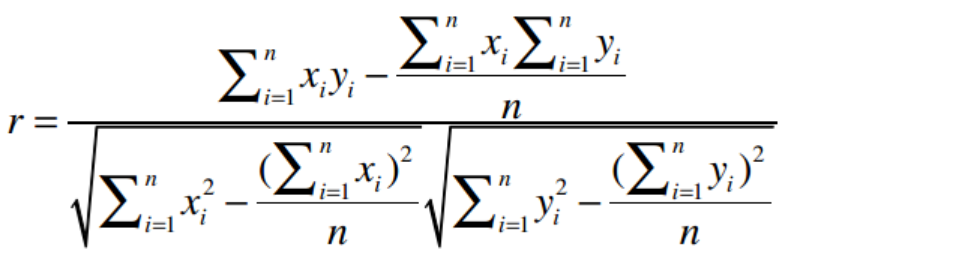

In [22]:
clara = [4.75, 4.5, 5, 4.25, 4]
robert = [4, 3, 5, 2, 1]
columns = ["Blues Traveler", "Norah Joinse", "Phoenix", "The Strokes", "Weird Ai"]

df_pearson = pd.DataFrame([clara, robert], index=["clara", "robert"], columns=columns)
df_pearson

,Blues Traveler,Norah Joinse,Phoenix,The Strokes,Weird Ai
clara,4.75,4.5,5,4.25,4
robert,4.00,3.0,5,2.00,1


### 计算 $\sum_{i=1}^{n}{x_iy_i}$

In [23]:
np.sum(df_pearson.iloc[0] * df_pearson.iloc[1])

70.0

### 计算 $\frac{\sum_{i=1}^{n}{x_i}\sum_{i=1}^{n}{y_i}}{n}$

In [24]:
(np.sum(df_pearson.iloc[0]) * np.sum(df_pearson.iloc[1])) / len(df_pearson.columns)

67.5

### 计算$\sum_{i=1}^{n}{x_iy_i} - \frac{\sum_{i=1}^{n}{x_i}\sum_{i=1}^{n}{y_i}}{n}$

In [25]:
np.sum(df_pearson.iloc[0] * df_pearson.iloc[1]) - (np.sum(df_pearson.iloc[0]) * np.sum(df_pearson.iloc[1])) / len(df_pearson.columns)

2.5

### 计算 $\sqrt{\sum_{i=1}^{n}{x_i}^2 - {(\sum_{i=1}^{n}{x_i})^2 \over {n}}}$ 

In [26]:
np.sqrt(np.sum(np.square(df_pearson.iloc[0])) - np.square(np.sum(df_pearson.iloc[0])) / len(df_pearson.columns))

0.79056941504209488

### 计算 $\sqrt{\sum_{i=1}^{n}{y_i}^2 - {(\sum_{i=1}^{n}{y_i})^2 \over {n}}}$ 

In [27]:
np.sqrt(np.sum(np.square(df_pearson.iloc[1])) - np.square(np.sum(df_pearson.iloc[1])) / len(df_pearson.columns))

3.1622776601683795

### 最后结果

In [28]:
2.5/(0.79056941 * 3.16227766)

1.0000000064310477

### 通过numpy内置函数计算相关系数

In [29]:
np.corrcoef(df_pearson.iloc[0], df_pearson.iloc[1])
# return result
# [[correlation(x, x), correlation(x, y)]
# [correlation(y, x), correlation(y,y)]]

array([[ 1.,  1.],
       [ 1.,  1.]])

## 余弦相似度
余弦相似度的范围从1到-1，1表示完全匹配，-1表示完全相悖

In [30]:
index = ["Ann", "Ben", "Sally"]
columns = ["The Decemberists The Kings is Dead", "Radionhead The King of Limbas", "Katy Perry E.T"]
dataset = [[10, 5, 32], 
           [15, 25, 1], 
           [12, 6, 27]]

df_cos = pd.DataFrame(dataset, index=index, columns=columns)
df_cos


,The Decemberists The Kings is Dead,Radionhead The King of Limbas,Katy Perry E.T
Ann,10,5,32
Ben,15,25,1
Sally,12,6,27


### $\cos{(x,y)} = \frac{x \cdot y}{{\mid\mid{x}\mid\mid}\times{\mid\mid{x}\mid\mid}}$
### ${\mid\mid{x}\mid\mid} = \sqrt{\sum_{i=1}^{n}{x_i^2}}$ 


假设两个向量值X = [X1, X2,…, Xn]和Y = [Y1, Y2,…, Yn]    

${{x \cdot y}}$ 
代表两个向量点积, 点积定义如下：    
${{x \cdot y}}$=X1Y1+X2Y2+……+XnYn.    

${\mid\mid{X}\mid\mid}$代表X向量的范数， 范数定义如下:     
${\mid\mid{x}\mid\mid} = \sqrt{\sum_{i=1}^{n}{x_i^2}}$

**其中范数可使用np.linalg.norm计算**

**点积可使用np.dot计算**


In [31]:
# 计算df_pearson里面的相似度
cos_relation = np.dot(df_pearson.iloc[0], df_pearson.iloc[1]) / (np.linalg.norm(df_pearson.iloc[0]) * np.linalg.norm(df_pearson.iloc[1]))
cos_relation

0.93515345857052168

如果数据存在“分数膨胀”问题，就使用皮尔逊相关系数。    

如果数据比较“密集”，变量之间基本都存在公有值，且这些距离数据是非常重要的，那就使用欧几里得或曼哈顿距离。    

如果数据是稀疏的，则使用余弦相似度。    

### 推荐书籍实践

In [32]:
df_book_rating = pd.read_csv("./BX-Book-Ratings.csv",delimiter=";", encoding="utf8")
df_book_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [33]:
import chardet

encoding = chardet.detect(open("./BX-Books.csv", mode="rb").read(10240)).get("encoding")
pd.read_csv("./BX-Books.csv", delimiter=';', encoding=encoding, error_bad_lines=False).head()

Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296: expected 8 fields, saw 9
Skipping line 259941: expected 8 fields, saw 9
Skipping line 261529: expected 8 fields, saw 9

C:\Users\YE\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### 可能pandas使用有问题或者自身逻辑有问题 下面代码执行会挂起

In [34]:
import chardet
class recommender(object):
    def __init__(self, data={}, k=1, n=3, metric="pearson"):
        self._data = data
        self._k = k
        self._n = n
        self._metric = metric
    
    @staticmethod
    def detect_encoding(file_path):
        # encoding = chardet.detect(open(file_path, mode="rb").read(10240)).get("encoding")
        encoding = "ISO-8859-1"
        
        return encoding
        
    def load_data(self, books_path="./BX-Books.csv", users_path="./BX-Users.csv", book_ratings_path="./BX-Book-Ratings.csv"):
        encoding_books = self.detect_encoding(books_path)
        encoding_users = self.detect_encoding(users_path)
        encoding_book_ratings = self.detect_encoding(book_ratings_path)
        
        self._books = pd.read_csv(books_path, delimiter=';', encoding=encoding_books, error_bad_lines=False)
        self._users = pd.read_csv(users_path, delimiter=';', encoding=encoding_users, error_bad_lines=False)
        self._book_ratings = pd.read_csv(book_ratings_path, delimiter=';', encoding=encoding_book_ratings, error_bad_lines=False)
        # self._book_ratings.set_index("ISBN")
    
    def compute_nearest_neighbor(self, user_id):
        distance_lis = []
        for user in self._users["User-ID"]:
            if user != user_id:
                distance = self.pearson(user_id, user)
                distance_lis.append((user, distance))
        
        distance_lis.sort(key=lambda x:x[1], reverse=True)
        
        return distance_lis
    
    
    def pearson(self, user1, user2):
        user1_exist = len(self._book_ratings[self._book_ratings["User-ID"] == user1])
        user2_exist = len(self._book_ratings[self._book_ratings["User-ID"] == user2])
        
        if user1_exist and user2_exist:
            #  找到该用户评论的书籍
            user1_ratings = self._book_ratings[self._book_ratings["User-ID"] == user1]
            user2_ratings = self._book_ratings[self._book_ratings["User-ID"] == user2]
            
            # 只有两者都评论的
            if len(user2_ratings[user2_ratings.ISBN.isin(user1_ratings.ISBN)]):
                # 将user评论列表中都评论的书籍取出
                user1_ratings = user1_ratings[user1_ratings.ISBN.isin(user2_ratings.ISBN)]
                user2_ratings = user2_ratings[user2_ratings.ISBN.isin(user1_ratings.ISBN)]
                
                # 保证顺序一致
                user1_ratings =  user1_ratings.sort_values("ISBN")
                user2_ratings =  user2_ratings.sort_values("ISBN")
                
                # 计算pearson系数
#                 distance = np.corrcoef(user1_ratings["Book-Rating"], user2_ratings["Book-Rating"])

#                 return distance[0][1]
                return 1
            else:
                return 0
            
            
        else:
            return 0
            # raise Exception("User didn't rating: user1[{}] user2[{}]".format(user1_exist, user2_exist))
            
        
    
    def recommend(self, user_id):
        user_ratings = self._book_ratings[self._book_ratings["User-ID"] == user_id]
        if not len(user_ratings):
            return "用户没有评价任何书籍"
            
        recommendations = {}
        nearest = self.compute_nearest_neighbor(user_id)
        
        totalDistance = 0.0
        for i in range(self._k):
            totalDistance += nearest[i][1]
        
        
        for i in range(self._k):
            weight = nearest[i][1] / totalDistance
            
            recommend_user = self._book_ratings[self._book_ratings.ISBN == nearest[i][0]]
            
            # ~代表取反
            should_recommend = recommend_user[~recommend_user.ISBN.isin(user_ratings.ISBN)]
            
            for book_ISBN in should_recommend.ISBN:
                artist = self._books[self._books.ISBN == book_ISBN]["Book-Title"]
                rating = self._book_ratings[self._book_ratings.ISBN == book_ISBN]["Book-Rating"]
                recommendations[artist] =  rating * weight
            
        
        recommend_lis = list(recommendations.items())
        recommend_lis.sort(key=lambda x: x[1], reverse=True)
        
        return recommend_lis[:self._n]
        
        

In [35]:
r = recommender()
r.load_data()

Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296: expected 8 fields, saw 9
Skipping line 259941: expected 8 fields, saw 9
Skipping line 261529: expected 8 fields, saw 9

C:\Users\YE\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2827: DtypeWarning: Columns (3) 